In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dt = pd.read_csv(r'C:\Users\Divya Haridas\Desktop\cancer.csv')
dt.head()
np.array(list(dt.columns),dtype=object)
dt.isnull().sum()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(dt)
df = pd.DataFrame(data=df,columns=dt.columns)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,-0.347848,-0.819903,-0.906679,-0.214954,-0.083340,-0.398718,-0.743202,-1.288162,-1.167040,-0.218941,...,-0.381548,0.065746,-0.980760,-0.870694,-0.328743,-1.224625,-0.838618,-0.418550,0.728655,-1.002002
1,-1.681238,-0.819903,-0.413919,-1.360357,-0.083340,-0.873383,-0.272821,-1.288162,-1.167040,-1.160623,...,-1.273014,-0.387677,1.208436,2.069186,0.993281,-0.805663,-1.384593,1.544171,-0.628245,-1.002002
2,-0.181174,-0.819903,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,1.193582,...,1.847119,1.426018,2.084114,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245,0.998002
3,-0.014501,-0.819903,1.557123,0.930449,0.926842,1.025275,0.667941,1.418061,1.175473,1.193582,...,0.064186,-0.841101,-0.542921,-1.360675,0.111931,0.451222,1.345283,1.544171,1.407105,-1.002002
4,0.735531,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,-0.381548,-0.841101,-0.105081,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205,0.998002


Chi squared value :  22449.672246748152
p value :  0.0
KMO Test value:  0.7746133411545892
Factor Loadings:
                                 0         1         2         3         4  \
Age                       0.038122 -0.013775  0.082824 -0.052509 -0.101997   
Gender                   -0.181870 -0.055164  0.015155 -0.030671 -0.106291   
Air Pollution             0.699255  0.109384  0.127722  0.067447 -0.077470   
Alcohol use               0.856288  0.183345  0.015361  0.249515 -0.116746   
Dust Allergy              0.761934  0.228460  0.199672  0.296831 -0.009777   
OccuPational Hazards      0.889691  0.055516  0.040533  0.267069 -0.074172   
Genetic Risk              0.908541  0.032624  0.103214  0.289650 -0.122931   
chronic Lung Disease      0.830783 -0.024251 -0.030711  0.128808 -0.034746   
Balanced Diet             0.831215  0.283369  0.040242 -0.176539  0.101140   
Obesity                   0.781463  0.163022  0.406465 -0.079939  0.104974   
Smoking                   0.695207

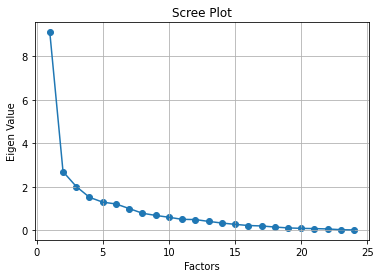

In [4]:
#BARTLETT AND KMO TEST
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
chi2,p = calculate_bartlett_sphericity(df)
print("Chi squared value : ",chi2)
print("p value : ",p)
kmo_all,kmo_model = calculate_kmo(dt)
print("KMO Test value: ",kmo_model)

#DETERMINING NUMBER OF FACTORS AND SCREE PLOT
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=df.shape[1])
fa.fit(df)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

#EIGEN VALUES, FACTOR LOADINGS, UNIQUENESS BY FACTOR ANALYSIS
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(dt)
with np.printoptions(suppress=True,precision=6):
    print("Factor Loadings:")
    print(pd.DataFrame(fa.loadings_,index=df.columns))
with np.printoptions(suppress=True,precision=6):
    print("Variance:")
    print(pd.DataFrame(fa.get_factor_variance(),index=['Eigen Values','Proportional Var','Cumulative Var']))
with np.printoptions(suppress=True,precision=6):
    print("Uniqueness:")
    print(pd.DataFrame(fa.get_uniquenesses(),index=df.columns,columns=['Uniqueness']))
with np.printoptions(precision=4,suppress=True):
    print("Eigen values:")
    print(pd.DataFrame(fa.get_communalities(),index=df.columns,columns=['Communalities']))


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

dt = pd.read_csv(r'C:\Users\Divya Haridas\Desktop\cancer.csv')
dt.head()
X=dt.iloc[:,:-1].values
Y=dt.iloc[:,-1].values

model = GaussianNB()
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.511
SVC(C=0.7, gamma=0.8)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  3.8min finished


In [4]:
def Snippet_146_Ex_2():
    print('**Optimizing hyper-parameters of a Decision Tree model using Grid Search in Python**\n')


    # importing libraries
    from sklearn import decomposition, datasets
    from sklearn import tree
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import StandardScaler

    # Loading wine dataset
    

    # Creating an standardscaler object
    std_slc = StandardScaler()

    # Creating a pca object
    pca = decomposition.PCA()

    # Creating a DecisionTreeClassifier
    dec_tree = tree.DecisionTreeClassifier()

    # Creating a pipeline of three steps. First, standardizing the data.
    # Second, tranforming the data with PCA.
    # Third, training a Decision Tree Classifier on the data.
    pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

    # Creating Parameter Space
    # Creating a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
    n_components = list(range(1,X.shape[1]+1,1))

    # Creating lists of parameter for Decision Tree Classifier
    criterion = ['gini', 'entropy']
    max_depth = [2,4,6,8,10,12]

    # Creating a dictionary of all the parameter options 
    # Note that we can access the parameters of steps of a pipeline by using '__’
    parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

    # Conducting Parameter Optmization With Pipeline
    # Creating a grid search object
    clf_GS = GridSearchCV(pipe, parameters)

    # Fitting the grid search
    clf_GS.fit(X, Y)

    # Viewing The Best Parameters
    print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
    print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
    print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
    print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])
Snippet_146_Ex_2()

**Optimizing hyper-parameters of a Decision Tree model using Grid Search in Python**

Best Criterion: gini
Best max_depth: 12
Best Number Of Components: 7

DecisionTreeClassifier(max_depth=12)


In [3]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix 


  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

from sklearn.model_selection import train_test_split 
  
X_train, X_test, Y_train, Y_test = train_test_split( X,Y, 
                test_size = 0.30, random_state = 101) 
  
# fitting the model for grid search 
grid.fit(X_train, Y_train) 
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(Y_test, grid_predictions)) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.521, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.514, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.514, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.521, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.514, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.514, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.414, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.529, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.543, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.8s finished
